In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [5]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
# cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
# val=['Away','Draw','Home']
# df_diff['Result']=np.select(cond,val)
# df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,1:]
y=df_diff.iloc[:,:1].values.ravel()

## Feature selection

Feature ranking:
1. feature Clean sheets (0.029)
2. feature Big Chances Created (0.024)
3. feature Assists (0.023)
4. feature Passes (0.023)
5. feature Goals (0.021)
6. feature Goals Conceded (0.021)
7. feature Accurate long balls (0.021)
8. feature Red cards (0.021)
9. feature Blocked shots (0.021)
10. feature Errors leading to goal (0.020)
11. feature Catches (0.020)
12. feature Throw outs (0.020)
13. feature Penalties Saved (0.020)
14. feature Yellow cards (0.020)
15. feature Crosses (0.020)
16. feature Goals with right foot (0.020)
17. feature Big chances missed (0.020)
18. feature Own goals (0.020)
19. feature Shooting accuracy % (0.020)
20. feature Sweeper clearances (0.020)
21. feature Cross accuracy % (0.020)
22. feature Clearances off line (0.020)
23. feature High Claims (0.020)
24. feature Fouls (0.020)
25. feature Goals with left foot (0.020)
26. feature Shots on target (0.020)
27. feature Passes per match (0.020)
28. feature Punches (0.020)
29. feature Hit woodwork (0.020)


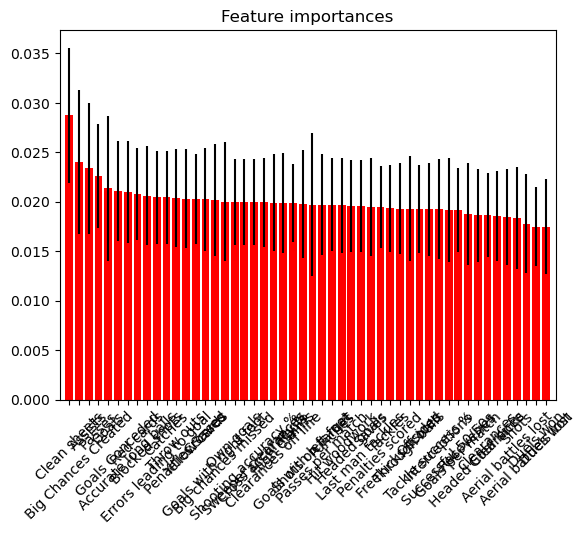

In [6]:
forest=RandomForestClassifier()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [3]:
X=X.drop(coalumns=X.columns[indices[15:]])

NameError: name 'indices' is not defined

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 50), (2835,), (354, 50), (354,), (355, 50), (355,))

## MLP hyperparameter tuning with gridsearch

In [16]:
parameters = {'max_iter': [1000,1500,2000 ], 'alpha': 10.0 ** -np.arange(1, 10,step=5), 'hidden_layer_sizes':np.arange(10, 15,step=5), 'random_state':[0,5,9]}


clf = GridSearchCV(MLPRegressor(), parameters, n_jobs=-1)
clf.fit(X_train,y_train)

GridSearchCV(estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-06]),
                         'hidden_layer_sizes': array([10]),
                         'max_iter': [1000, 1500, 2000],
                         'random_state': [0, 5, 9]})

In [17]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 1000, 'random_state': 9}
0.23903431559897684


In [18]:
clf.score(X_test,y_test)

0.23023850466307105

In [19]:
clf.score(X_val,y_val)

0.253295387937864